# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [2]:
import pandas as pd

# load the training dataset
data = pd.read_csv('https://raw.githubusercontent.com/Asharib706/ml-basics/ee7bccccf5dd1a95f9d547b2e9e5fd68f61fe02e/challenges/data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,0
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
77,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530,2
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,0
39,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760,0
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625,1


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

### Exploratory Data Analysis

In [3]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [5]:
label=data['WineVariety']
features=data.drop('WineVariety',axis=1)

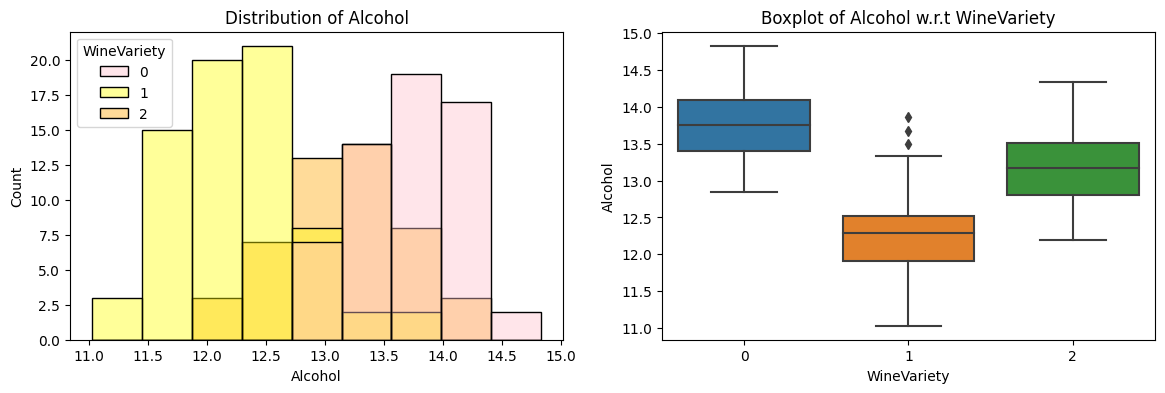

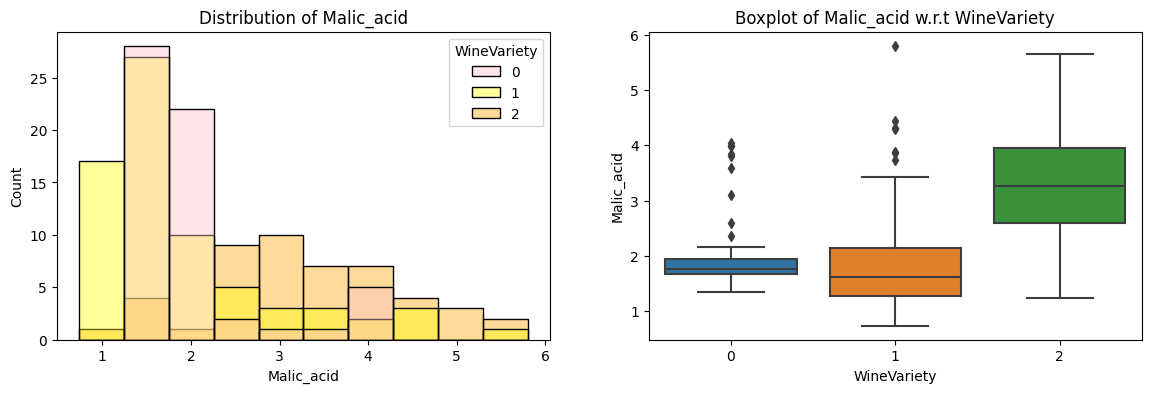

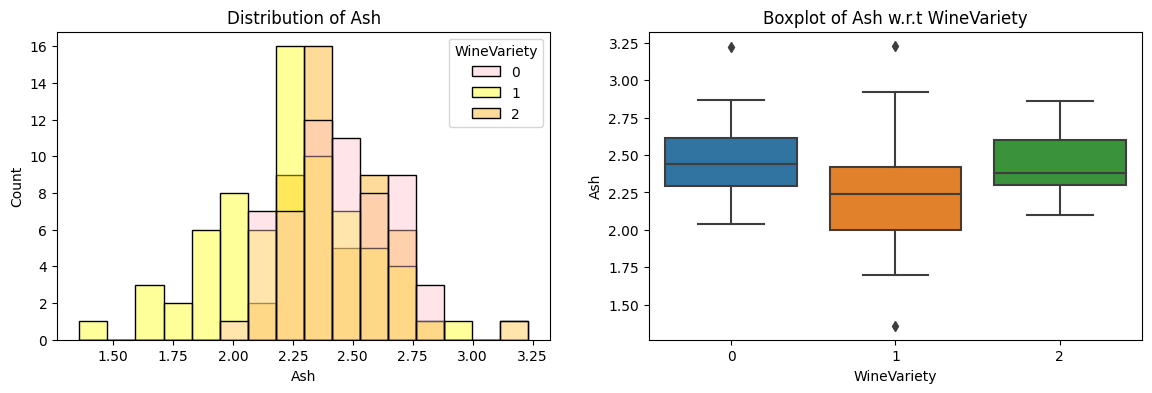

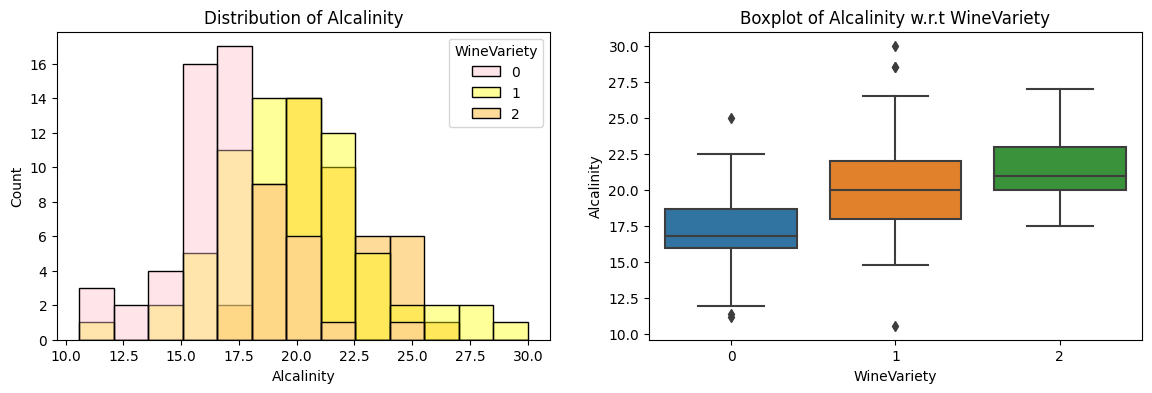

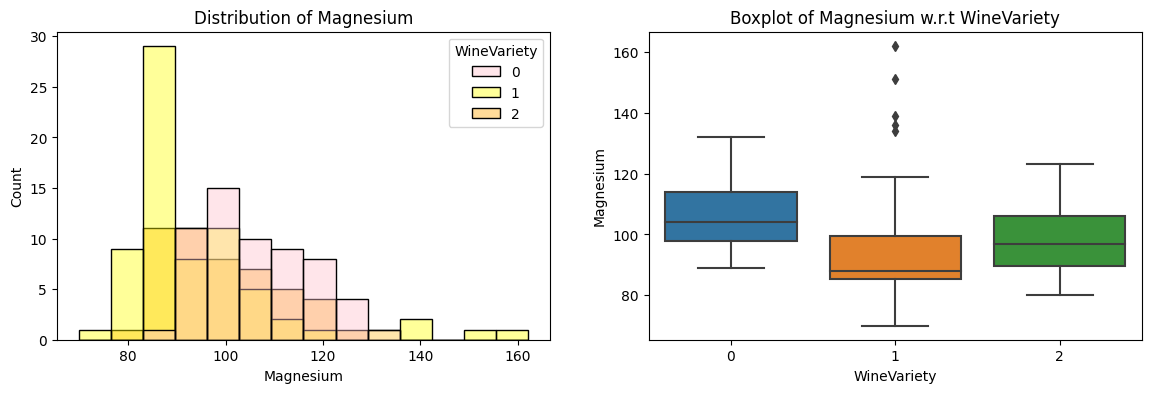

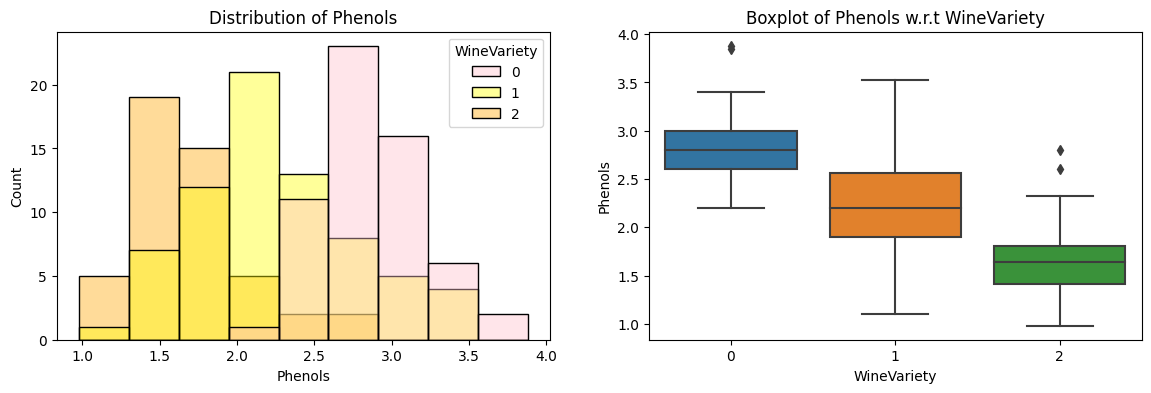

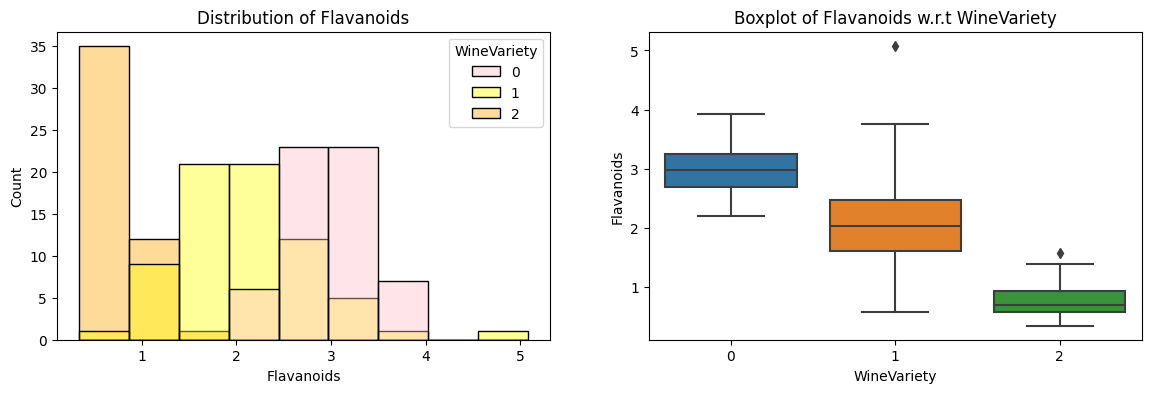

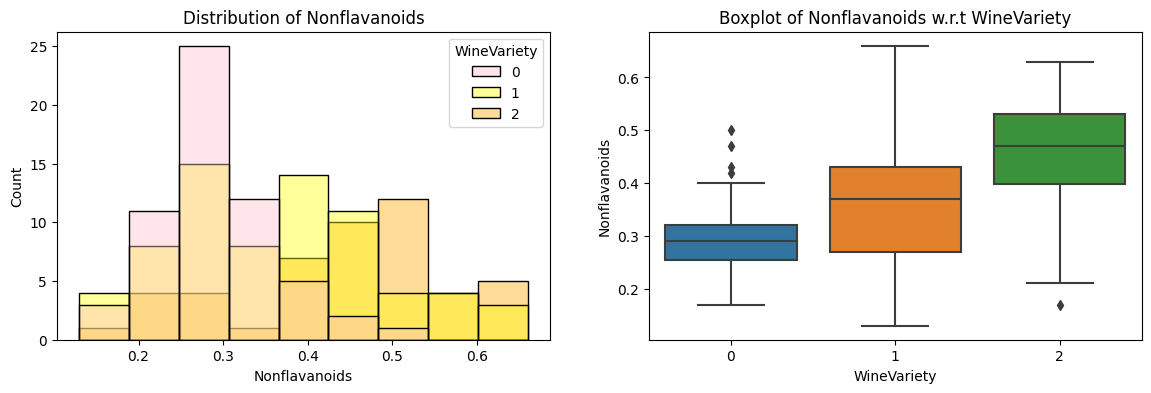

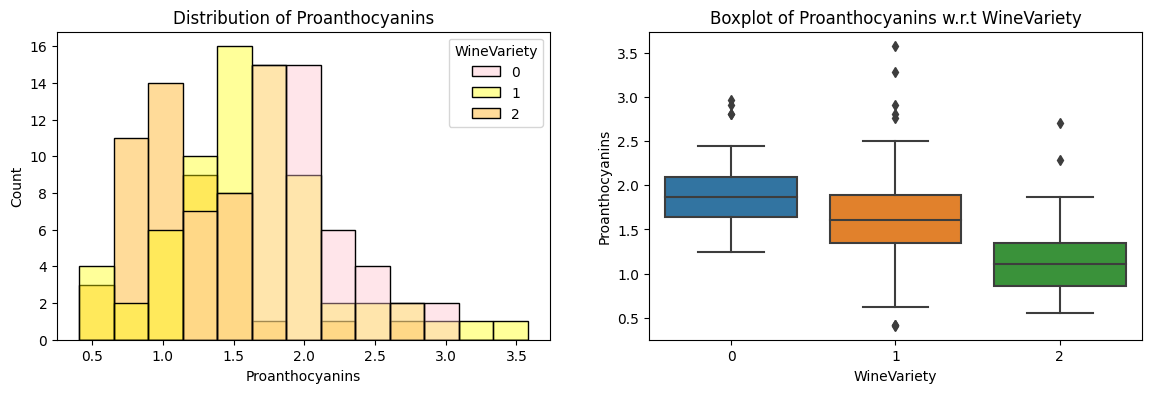

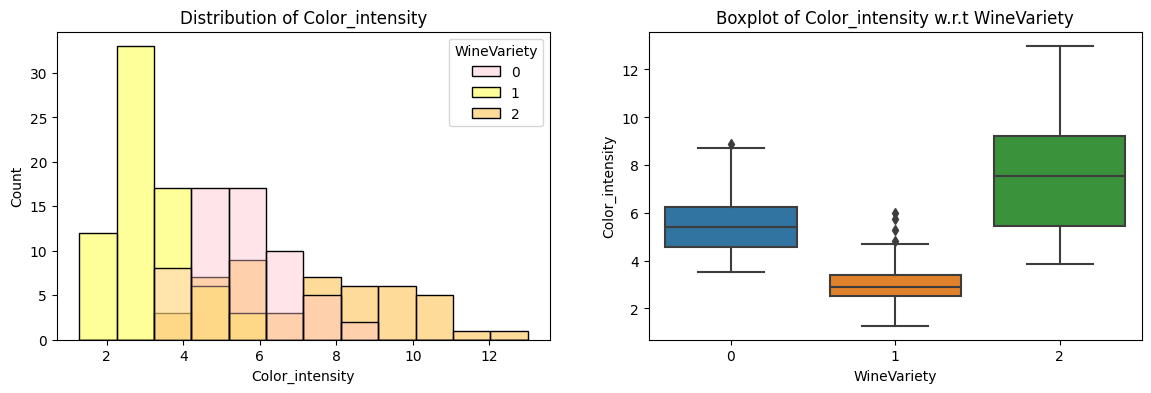

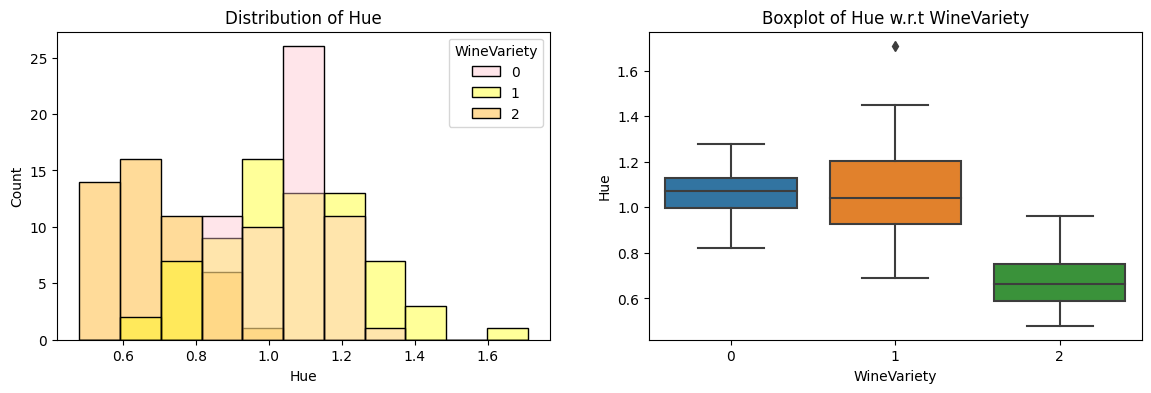

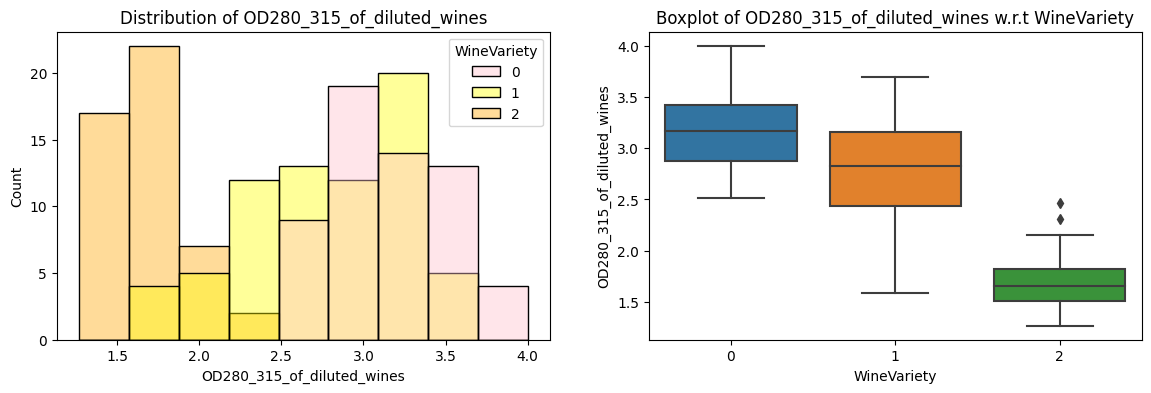

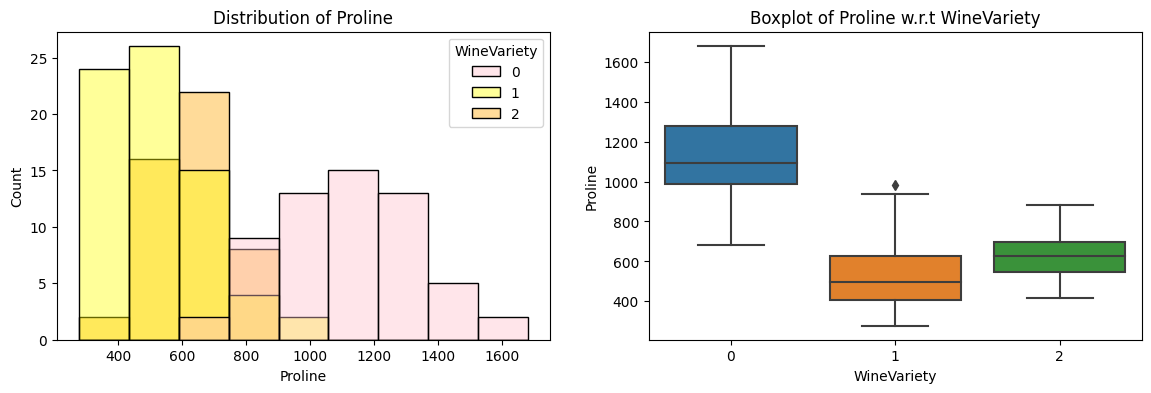

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in list(features):
  fig,axes=plt.subplots(1,2,figsize=(14,4))
  sns.histplot(x=i,hue='WineVariety',data=data,alpha=0.4,ax=axes[0],palette=['pink','yellow','orange'])
  axes[0].set_title(f'Distribution of {i}')
  sns.boxplot(y=i,x='WineVariety',data=data,ax=axes[1])
  axes[1].set_title(f'Boxplot of {i} w.r.t WineVariety')
  axes[1].set_xticks([0,1,2])

Except Ash every other attributes differentiate easily with variety of Alcohol 

In [7]:
# Distribution of variety of wine varity
label.sort_values().value_counts().unique()


array([71, 59, 48])

### Training the Model

In [8]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(features,label,test_size=0.25)
print(train_x.shape,test_x.shape)

(133, 13) (45, 13)


In [9]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression(solver='liblinear',multi_class='auto')
model.fit(train_x,train_y)

LogisticRegression(solver='liblinear')

In [10]:
model.score(test_x,test_y)

0.9777777777777777

In [13]:
predicted=model.predict(test_x)
predicted

array([1, 2, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1,
       0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 2,
       1])

In [22]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn. metrics import classification_report

print(classification_report(test_y, predicted))
print(confusion_matrix(predicted,test_y))
print("Overall Precision:",precision_score(test_y, predicted,average='macro'))
print("Overall Recall:",recall_score(test_y, predicted,average='macro'))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

[[11  0  0]
 [ 1 17  0]
 [ 0  0 16]]
Overall Precision: 0.9814814814814815
Overall Recall: 0.9722222222222222


### Saving The Model

In [30]:
import joblib
file_name='Wine-Classification.pkl'
joblib.dump(model,file_name)

['Wine-Classification.pkl']

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [31]:
# Your code to predict classes for the two new samples
array=[[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]]

load_model=joblib.load('/content/Wine-Classification.pkl')
load_model.predict(array)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1])